<a href="https://colab.research.google.com/github/Tefong35/TefongEugene/blob/main/HI_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/sample_data/vehicle.csv")
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [ ]:
from sklearn.cluster import KMeans
df1 = df.drop(["class"], axis=1)
df1 = df1.dropna()
kmeans = KMeans(n_clusters = 45)
kmeans.fit(df1)
kmeans1_predictions = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
len(kmeans1_predictions)

813

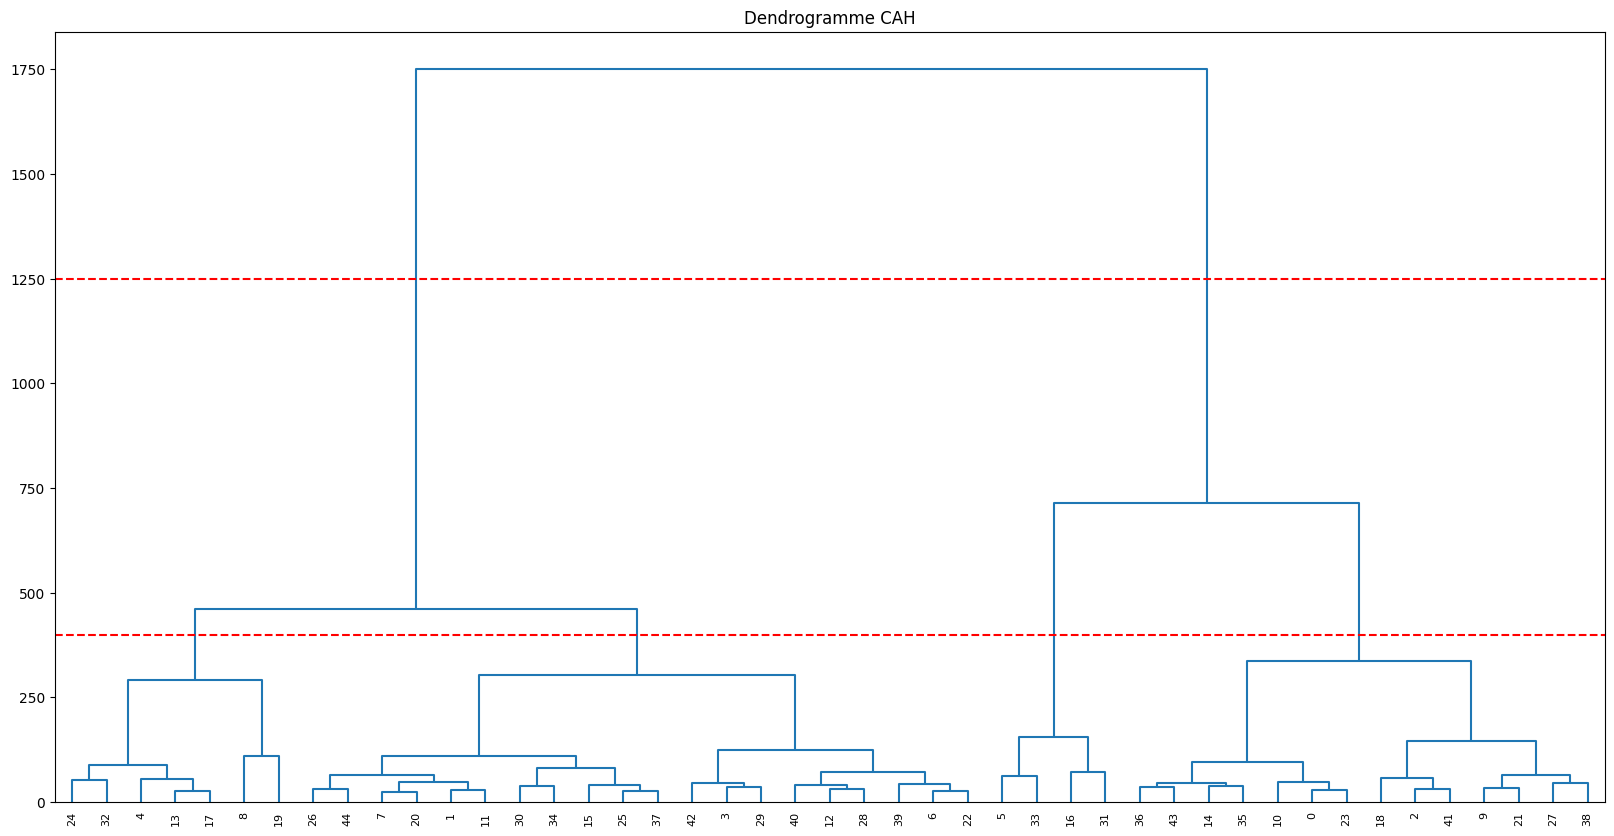

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
centroid_kmeans1 = kmeans.cluster_centers_
df_centroids = pd.DataFrame(centroid_kmeans1)
plt.figure(figsize=(20, 10))

# Génération de la matrice des liens
Z = linkage(df_centroids, method = 'ward', metric = 'euclidean')

# Affichage du dendrogramme
plt.title("Dendrogramme CAH")
dendrogram(Z , labels = df_centroids.index, leaf_rotation = 90., color_threshold = 0)
plt.axhline(1250, color='red', linestyle='--') # 150 anpassen
plt.axhline(400, color='red', linestyle='--')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Initialisation du classificateur CAH pour 4 clusters
cluster = AgglomerativeClustering(n_clusters = 4)
# Apprentissage des données
cluster.fit(df_centroids)
cah_clusters = cluster.labels_

In [ ]:
len(cah_clusters)

45

In [ ]:
centroid_kmeans1

array([[ 90.04761905,  35.76190476,  66.19047619, 137.71428571,
         57.52380952,   7.28571429, 128.47619048,  51.95238095,
         17.80952381, 129.85714286, 150.66666667, 245.57142857,
        118.76190476,  65.85714286,   3.57142857,  15.23809524,
        194.47619048, 200.52380952],
       [103.27272727,  53.        , 101.75757576, 183.15151515,
         58.06060606,  10.09090909, 213.24242424,  31.21212121,
         24.        , 167.93939394, 223.09090909, 672.54545455,
        213.60606061,  73.12121212,   7.90909091,  15.63636364,
        187.36363636, 195.75757576],
       [ 92.64      ,  46.2       ,  81.28      , 167.92      ,
         64.04      ,   8.84      , 159.36      ,  41.84      ,
         19.84      , 152.48      , 179.92      , 377.08      ,
        183.72      ,  70.52      ,   7.88      ,   9.48      ,
        189.04      , 196.8       ],
       [ 98.7       ,  45.2       ,  95.6       , 200.6       ,
         64.7       ,   8.1       , 191.7       ,  34.2  

In [ ]:
df1.shape

(813, 18)

In [ ]:
df1[0]

KeyError: ignored

In [ ]:
#kmeans1_predictions = kmeans.labels_
#kmeans1_predictions
cah_clusters = cluster.labels_
cah_clusters



array([3, 0, 1, 0, 1, 2, 1, 0, 1, 0, 3, 1, 1, 3, 1, 0, 3, 0, 0, 1, 1, 2,
       0, 0, 1, 0, 3, 0, 1, 3, 3, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0,
       3])

In [ ]:
plt.scatter(df1[:,0], df1[:,1])

InvalidIndexError: ignored

In [ ]:
den = centroid_kmeans1[0]
den

array([ 90.04761905,  35.76190476,  66.19047619, 137.71428571,
        57.52380952,   7.28571429, 128.47619048,  51.95238095,
        17.80952381, 129.85714286, 150.66666667, 245.57142857,
       118.76190476,  65.85714286,   3.57142857,  15.23809524,
       194.47619048, 200.52380952])

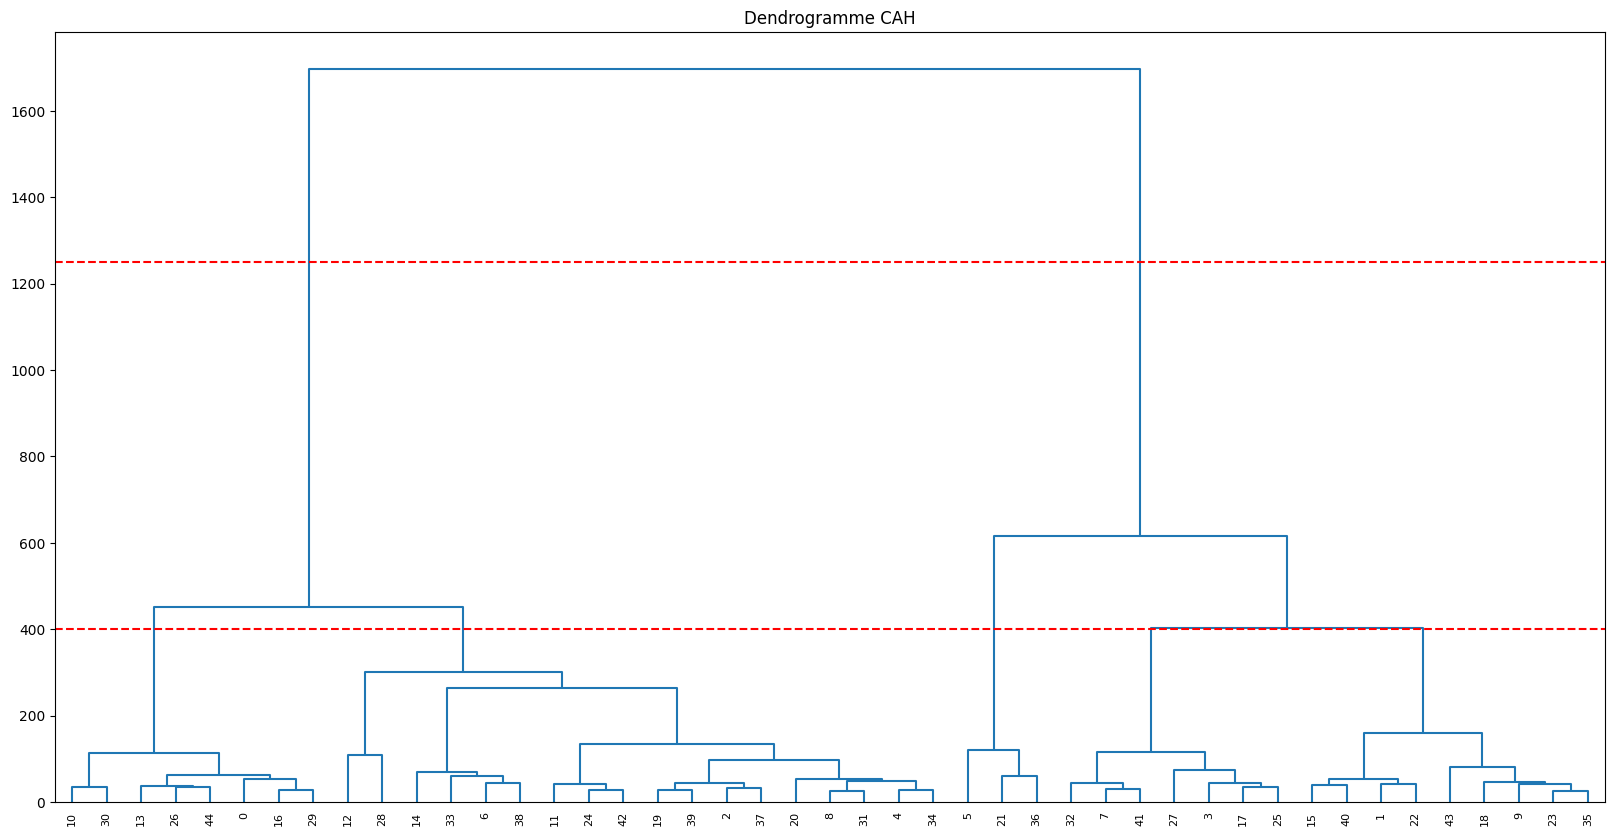

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
centroid_kmeans1 = kmeans.cluster_centers_
df_centroids = pd.DataFrame(centroid_kmeans1)
plt.figure(figsize=(20, 10))

# Génération de la matrice des liens
Z = linkage(df_centroids, method = 'ward', metric = 'euclidean')

# Affichage du dendrogramme
plt.title("Dendrogramme CAH")
dendrogram(Z , labels = df_centroids.index, leaf_rotation = 90., color_threshold = 0)
plt.axhline(1250, color='red', linestyle='--') # 150 anpassen
plt.axhline(400, color='red', linestyle='--')
plt.show()

In [ ]:
pd.Series(kmeans.labels_).value_counts()

20    52
1     33
8     32
19    32
39    32
26    29
35    26
4     26
30    26
31    26
37    26
2     25
38    21
0     21
23    21
13    21
15    21
34    20
6     20
44    19
11    18
33    18
22    16
10    16
14    15
41    15
18    15
7     15
40    14
25    14
29    13
16    13
17    12
9     11
24    11
3     10
5     10
32     9
42     9
27     9
36     7
12     5
21     4
28     3
43     2
dtype: int64

(array([115.,  77.,  71.,  61., 103.,  91.,  51.,  99.,  86.,  59.]),
 array([ 0. ,  4.4,  8.8, 13.2, 17.6, 22. , 26.4, 30.8, 35.2, 39.6, 44. ]),
 <BarContainer object of 10 artists>)

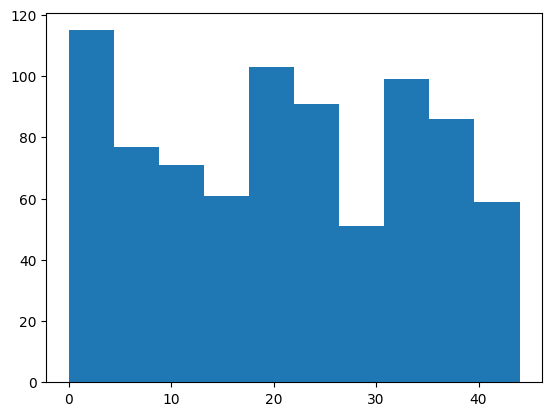

In [ ]:
plt.hist(pd.Series(kmeans.labels_))

In [ ]:
preds = kmeans.labels_
kmeans_df = pd.DataFrame(df1)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,KMeans_Clusters
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,8
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,15
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,16
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,12
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,37
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,34
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,0
10,86,36.0,70.0,143.0,61.0,9,133.0,50.0,18.0,130,153.0,266.0,127.0,66.0,2.0,10.0,194.0,202,29
11,90,34.0,66.0,136.0,55.0,6,123.0,54.0,17.0,118,148.0,224.0,118.0,65.0,5.0,26.0,196.0,202,0


In [ ]:
centers = np.array(centroid_kmeans1)
centers

array([[105.3       ,  54.9       , 103.95      , 224.4       ,
         68.65      ,  11.        , 217.8       ,  30.5       ,
         24.4       , 170.75      , 227.95      , 702.35      ,
        219.9       ,  70.65      ,   7.7       ,  11.75      ,
        188.2       , 198.35      ],
       [ 84.47826087,  42.86956522,  66.60869565, 125.13043478,
         55.19565217,   6.76086957, 149.67391304,  45.39130435,
         19.        , 143.45652174, 170.        , 326.39130435,
        174.47826087,  83.69565217,   5.67391304,   8.95652174,
        179.7173913 , 183.23913043],
       [ 99.36363636,  48.45454545,  89.81818182, 203.63636364,
         66.        ,   8.09090909, 184.27272727,  35.18181818,
         21.63636364, 154.90909091, 202.81818182, 516.90909091,
        185.72727273,  67.54545455,   8.27272727,   9.63636364,
        196.63636364, 201.81818182],
       [ 84.34615385,  35.92307692,  52.42307692, 114.53846154,
         55.26923077,   4.65384615, 119.19230769,  56.692

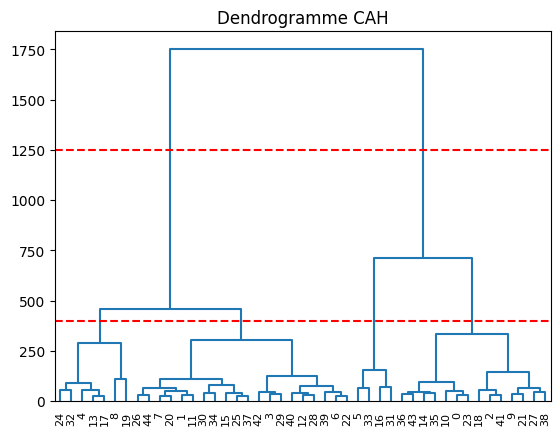

In [ ]:
# Génération de la matrice des liens
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(centers, method = 'ward', metric = 'euclidean')

# Affichage du dendrogramme
plt.title("Dendrogramme CAH")
dendrogram(Z , labels = df_centroids.index, leaf_rotation = 90., color_threshold = 0)
plt.axhline(1250, color='red', linestyle='--') # 150 anpassen
plt.axhline(400, color='red', linestyle='--')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Initialisation du classificateur CAH pour 3 clusters
cluster = AgglomerativeClustering(n_clusters = 4)
# Apprentissage des données
cluster.fit(centers)

AgglomerativeClustering(n_clusters=4)

In [ ]:
cah_clusters = cluster.labels_
cah_clusters

array([0, 1, 0, 1, 3, 2, 1, 1, 3, 0, 0, 1, 1, 3, 0, 1, 2, 3, 0, 3, 1, 0,
       1, 0, 3, 1, 1, 0, 1, 1, 1, 2, 3, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1])

In [ ]:
#df1["cluster_kmeans"] = pd.DataFrame(kmeans.labels_)
#df1.cluster_kmeans.value_counts()
preds = kmeans.labels_
kmeans_df = pd.DataFrame(df1)
kmeans_df['KMeans_Clusters'] = preds
#kmeans_df.head(20)
df1.KMeans_Clusters.value_counts()

1     46
15    35
11    32
37    31
28    31
23    30
3     26
20    26
30    25
7     25
36    23
26    22
25    22
32    21
34    21
4     21
0     20
27    20
43    19
21    19
9     18
12    17
41    17
10    17
40    17
44    17
29    15
6     15
35    15
39    14
24    14
13    13
14    13
38    12
22    12
17    11
2     11
42    11
18     8
16     7
33     7
31     6
19     5
5      3
8      3
Name: KMeans_Clusters, dtype: int64

In [ ]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'